# Import Libraries

In [31]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Dataset Import

In [513]:
df = pd.read_csv('adult-all.csv')

In [514]:
df.columns = ['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','salary']

In [515]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [516]:
df.shape

(48841, 15)

# Handling Missing Values

In [517]:
df[df == '?'] = np.nan

In [518]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48841 non-null  int64 
 1   workclass       46042 non-null  object
 2   fnlwgt          48841 non-null  int64 
 3   education       48841 non-null  object
 4   education_num   48841 non-null  int64 
 5   marital_status  48841 non-null  object
 6   occupation      46032 non-null  object
 7   relationship    48841 non-null  object
 8   race            48841 non-null  object
 9   sex             48841 non-null  object
 10  capital_gain    48841 non-null  int64 
 11  capital_loss    48841 non-null  int64 
 12  hours_per_week  48841 non-null  int64 
 13  native_country  47984 non-null  object
 14  salary          48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [519]:
df.isnull().sum().sum()

6465

In [520]:
df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     857
salary               0
dtype: int64

In [521]:
df['native_country'].mode()

0    United-States
Name: native_country, dtype: object

In [522]:
for cols in ['workclass', 'occupation', 'native_country']:
    df[cols].fillna(df[cols].mode()[0], inplace=True)

In [523]:
df['education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [524]:
df.drop(['education'], axis=1,inplace=True)

In [525]:
df['salary'].value_counts()

<=50K    37154
>50K     11687
Name: salary, dtype: int64

In [526]:
df['salary'].value_counts()

<=50K    37154
>50K     11687
Name: salary, dtype: int64

In [527]:
df.drop_duplicates(subset ="salary",)

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
6,52,Self-emp-not-inc,209642,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K


In [528]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,48841.0,NaN,NaN,NaN,38.643578,13.71065,17.0,28.0,37.0,48.0,90.0
workclass,48841,8,Private,36705,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,48841.0,NaN,NaN,NaN,189666.430786,105603.887256,12285.0,117555.0,178147.0,237646.0,1490400.0
education_num,48841.0,NaN,NaN,NaN,10.078029,2.570965,1.0,9.0,10.0,12.0,16.0
marital_status,48841,7,Married-civ-spouse,22379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,48841,14,Prof-specialty,8981,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,48841,6,Husband,19716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,48841,5,White,41761,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,48841,2,Male,32649,NaN,NaN,NaN,NaN,NaN,NaN,NaN
capital_gain,48841.0,NaN,NaN,NaN,1079.045208,7452.0937,0.0,0.0,0.0,0.0,99999.0


In [529]:
df['capital_gain'].max()

99999

In [530]:
indexAge = df[ (df['capital_gain'] == df['capital_gain'].max()) | (df['capital_loss'] == df['capital_loss'].max()) ].index
df.drop(indexAge , inplace=True)

<AxesSubplot:xlabel='salary', ylabel='count'>

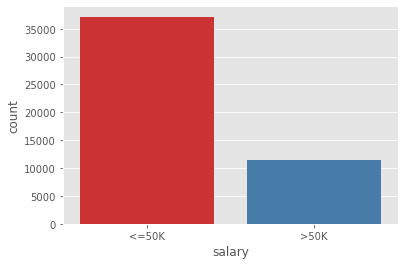

In [531]:
sns.set_palette("Set1",)
sns.countplot(x ='salary', data = df)

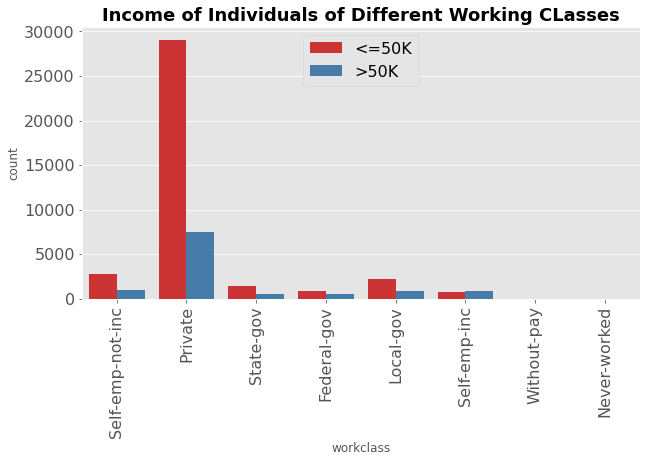

In [532]:
plt.figure(figsize=(10,5))
sns.countplot(df['workclass'], hue = df['salary'])
plt.title('Income of Individuals of Different Working CLasses', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

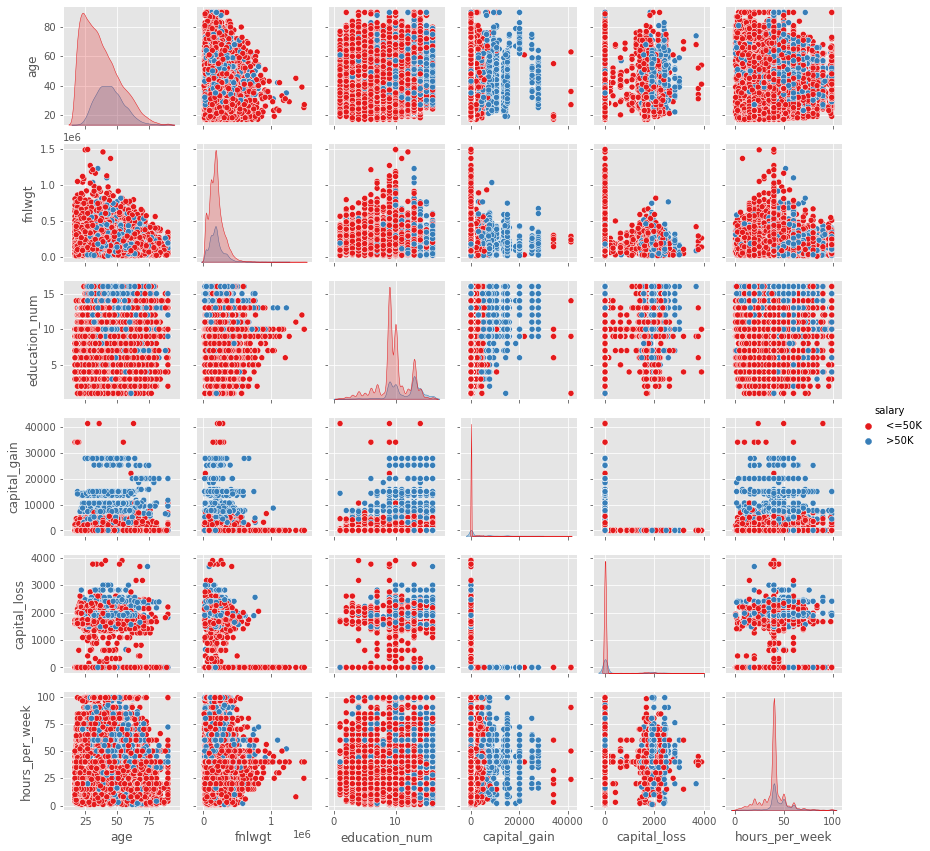

In [533]:
sns.pairplot(df,hue='salary', height=2)
plt.show()

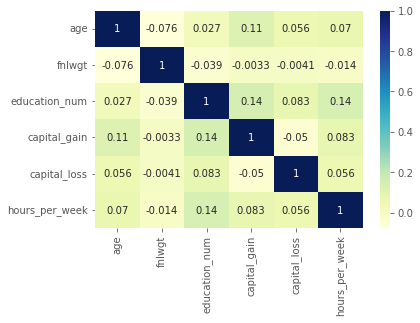

In [534]:
sns.heatmap(df.corr(),annot = True, cmap="YlGnBu");

<AxesSubplot:xlabel='salary', ylabel='age'>

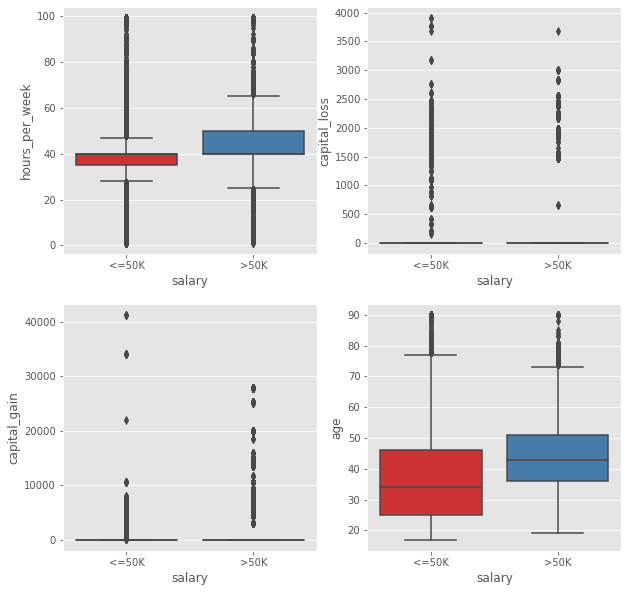

In [535]:
plt.figure(figsize=(10,10))

plt.subplot(221)
sns.boxplot(x='salary', y='hours_per_week', data=df)
plt.subplot(222)
sns.boxplot(x='salary', y='capital_loss', data=df)
plt.subplot(223)
sns.boxplot(x='salary', y='capital_gain', data=df)
plt.subplot(224)
sns.boxplot(x='salary', y='age', data=df)

In [536]:
# # IQR
# Q1 = np.percentile(df['age'], 25,
#                 interpolation = 'midpoint')
 
# Q3 = np.percentile(df['age'], 75,
#                 interpolation = 'midpoint')
# IQR = Q3 - Q1
 
# print("Old Shape: ", df.shape)
 
# # Upper bound
# upper = np.where(df['age'] >= (Q3+1.5*IQR))
 
# # Lower bound
# lower = np.where(df['age'] <= (Q1-1.5*IQR))
 
# # Removing the Outliers
# df.drop(upper[0],inplace = True)
# df.drop(lower[0],inplace = True)

 
# print("New Shape: ", df.shape)

In [537]:
from sklearn.preprocessing import LabelEncoder

categorical = ['workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country','salary']
for feature in categorical:
        labelencoder = LabelEncoder()
        df[feature] = labelencoder.fit_transform(df[feature])

In [538]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [539]:
scaler.fit(df.drop('salary',axis=1))
scaled_features = scaler.transform(df.drop('salary',axis=1))

In [540]:
df_scaled = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_scaled.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0.452055,0.714286,0.048052,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.0,0.0,0.122449,0.95
1,0.287671,0.428571,0.137581,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.0,0.0,0.397959,0.95
2,0.493151,0.428571,0.150486,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.0,0.0,0.397959,0.95
3,0.150685,0.428571,0.220635,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.0,0.0,0.397959,0.10
4,0.273973,0.428571,0.184219,0.866667,0.333333,0.230769,1.0,1.0,0.0,0.0,0.0,0.397959,0.95


In [541]:
from collections import Counter

In [542]:
Counter(df['salary'])

Counter({0: 37151, 1: 11443})

In [543]:
from sklearn.model_selection import train_test_split

In [544]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df['salary'], test_size=0.33, random_state=369)

In [545]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(32557, 13) (32557,) (16037, 13) (16037,)


In [546]:
y_train.value_counts()

0    24931
1     7626
Name: salary, dtype: int64

In [547]:
from imblearn.under_sampling import RandomUnderSampler

In [548]:
rus = RandomUnderSampler(random_state=369, replacement=True)

In [549]:
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)

In [550]:
# from imblearn.under_sampling import TomekLinks

In [551]:
# tl = TomekLinks()

In [552]:
# X_train_res, y_train_res = tl.fit_resample(X_train, y_train)

In [553]:
# from imblearn.over_sampling import SMOTE

In [554]:
# smote_obj = SMOTE(random_state=369)

In [555]:
# X_train_res, y_train_res = smote_obj.fit_resample(X_train, y_train)

In [556]:
Counter(y_train_res)

Counter({0: 7626, 1: 7626})

In [557]:
from sklearn.neighbors import KNeighborsClassifier

In [558]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [559]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_res,y_train_res.ravel())
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

Minimum error:- 0.19610899794225853 at K = 5


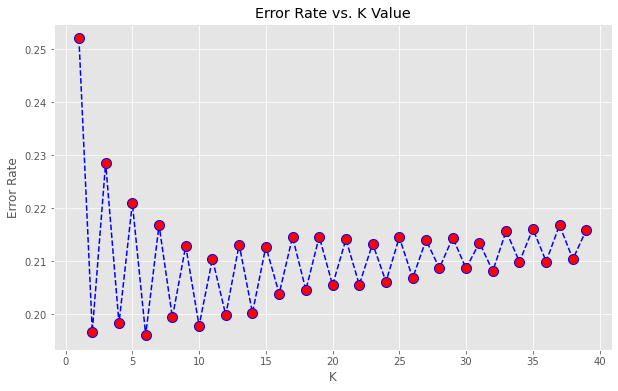

In [473]:
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='Blue',linestyle='--',marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [560]:
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_res,y_train_res.ravel())
pred = knn.predict(X_test)

print('Confusion Matrix::')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print('Classification Report::')
print('\n')
print(classification_report(y_test,pred))

Confusion Matrix::


[[9394 2826]
 [ 717 3100]]


Classification Report::


              precision    recall  f1-score   support

           0       0.93      0.77      0.84     12220
           1       0.52      0.81      0.64      3817

    accuracy                           0.78     16037
   macro avg       0.73      0.79      0.74     16037
weighted avg       0.83      0.78      0.79     16037



In [475]:
from sklearn.metrics import classification_report, confusion_matrix

knn_model = KNeighborsClassifier()

param_grid = {'n_neighbors': np.arange(1, 30)}

knn_gscv = GridSearchCV(knn_model, param_grid, cv=5)

knn_gscv.fit(X_train_res,y_train_res)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [400]:
knn_gscv.best_params_

{'n_neighbors': 9}

In [401]:
knn_gscv.best_score_

0.7983870270967326

In [561]:
from sklearn.metrics import classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=9)

knn.fit(X_train_res,y_train_res.ravel())
pred = knn.predict(X_test)

print('Confusion Matrix::')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print('Classification Report::')
print('\n')
print(classification_report(y_test,pred))

Confusion Matrix::


[[9459 2761]
 [ 653 3164]]


Classification Report::


              precision    recall  f1-score   support

           0       0.94      0.77      0.85     12220
           1       0.53      0.83      0.65      3817

    accuracy                           0.79     16037
   macro avg       0.73      0.80      0.75     16037
weighted avg       0.84      0.79      0.80     16037



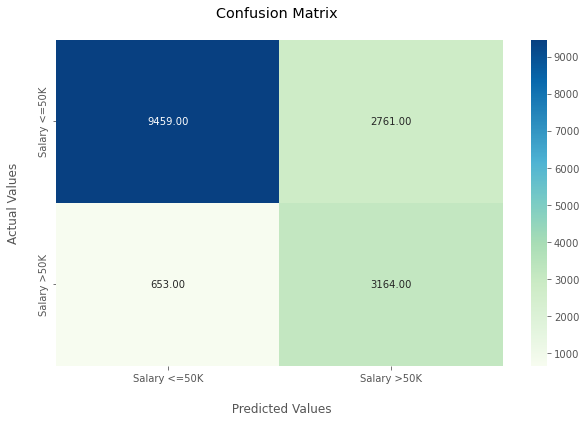

In [562]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['Salary <=50K','Salary >50K'])
fx.yaxis.set_ticklabels(['Salary <=50K','Salary >50K'])
plt.show()

In [416]:
from sklearn.metrics import roc_auc_score,roc_curve

In [417]:
pred_prob = knn.predict_proba(X_test)

In [418]:
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label=1)

In [419]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [420]:
auc_score = roc_auc_score(y_test, pred_prob[:,1])
auc_score

0.8605863187643187

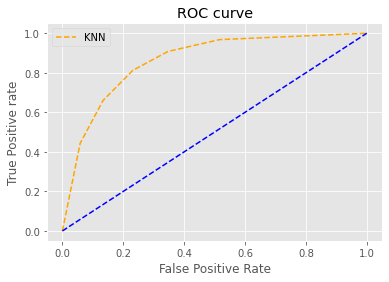

In [421]:
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)